In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
store = pd.read_csv('store.csv')
train = pd.read_csv('salestrain.csv')
test = pd.read_csv('salestest.csv')

C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0,0,0
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0,0,0
4,5,a,a,29910,4,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880,4,2006,0,0,0,0
1112,1113,a,c,9260,0,0,0,0,0,0
1113,1114,a,c,870,0,0,0,0,0,0


In [4]:
from datetime import date
train['Date'] = pd.to_datetime(train.Date, format="%Y-%m-%d")
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day_name'] = train['Date'].dt.day_name()

In [5]:
target = train['Sales']

In [6]:
train1 = train.drop(['Date','day_name','Sales'],axis=1)

In [7]:
train['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
train1

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
0,1,5,555,1,1,0,1,2015,7
1,2,5,625,1,1,0,1,2015,7
2,3,5,821,1,1,0,1,2015,7
3,4,5,1498,1,1,0,1,2015,7
4,5,5,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,a,1,2013,1
1017205,1112,2,0,0,0,a,1,2013,1
1017206,1113,2,0,0,0,a,1,2013,1
1017207,1114,2,0,0,0,a,1,2013,1


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
l = []
for v in train['StateHoliday']:
    if v==0 or v=='0':
        l.append('0')
    if v=='a':
        l.append('1')
    if v=='b':
        l.append('2')
    if v=='c':
        l.append('3')

In [11]:
train1 = train.drop(['StateHoliday','Date'],axis=1)
train1['StateHoliday']=l

In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
SchoolHoliday    1017209 non-null int64
year             1017209 non-null int64
month            1017209 non-null int64
day_name         1017209 non-null object
StateHoliday     1017209 non-null object
dtypes: int64(9), object(2)
memory usage: 85.4+ MB


In [13]:
test['Date'] = pd.to_datetime(test.Date, format="%Y-%m-%d")
test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['day_name'] = test['Date'].dt.day_name()

In [14]:
test = test.drop(['Date','day_name','Id'],axis=1)

In [15]:
lt = []
for v in test['StateHoliday']:
    if v==0 or v=='0':
        lt.append('0')
    if v=='a':
        lt.append('1')

In [16]:
test1=test.drop(['StateHoliday'],axis=1)
test1['StateHoliday']=lt

In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store['PromoInterval'].isnull().value_counts()

False    571
True     544
Name: PromoInterval, dtype: int64

In [19]:
store = store.fillna('0')

In [20]:
store['PromoInterval'].value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [21]:
n = []
for s in store['PromoInterval']:
    if s=='0':
        n.append('0')
    elif s=='Jan,Apr,Jul,Oct':
        n.append('1')
    elif s=='Feb,May,Aug,Nov':
        n.append('2')
    elif s=='Mar,Jun,Sept,Dec':
        n.append('3')

In [22]:
len(n)

1115

In [23]:
store1 = store.drop(['PromoInterval'], axis=1)

In [24]:
store1['PromoInterval'] = n

In [25]:
traindata = pd.merge(train, store1, how = 'left', on='Store')

In [26]:
testdata = pd.merge(test, store1, how = 'left', on='Store')

In [27]:
traindata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,day_name,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,Friday,c,a,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,Friday,a,a,570,11,2007,1,13,2010,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,Friday,a,a,14130,12,2006,1,14,2011,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,Friday,c,c,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,Friday,a,a,29910,4,2015,0,0,0,0


In [28]:
traindata['Assortment'] = le.fit_transform(traindata['Assortment'])
traindata['StoreType'] = le.fit_transform(traindata['StoreType'])

In [29]:
traindata = traindata.drop(['Date'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
traindata['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [32]:
l = []
for v in traindata['StateHoliday']:
    if v==0 or v=='0':
        l.append('0')
    if v=='a':
        l.append('1')
    if v=='b':
        l.append('2')
    if v=='c':
        l.append('3')

In [33]:
traindata = traindata.drop(['StateHoliday'],axis=1)
traindata['StateHoliday'] = l

In [34]:
traindata.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'year', 'month', 'day_name', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StateHoliday'],
      dtype='object')

In [35]:
traindata = traindata.drop(['day_name'],axis=1)

In [36]:
traindata.dtypes

Store                         int64
DayOfWeek                     int64
Sales                         int64
Customers                     int64
Open                          int64
Promo                         int64
SchoolHoliday                 int64
year                          int64
month                         int64
StoreType                     int32
Assortment                    int32
CompetitionDistance          object
CompetitionOpenSinceMonth    object
CompetitionOpenSinceYear     object
Promo2                        int64
Promo2SinceWeek              object
Promo2SinceYear              object
PromoInterval                object
StateHoliday                 object
dtype: object

In [37]:
traindata = traindata.drop_duplicates(keep="first", inplace=False)

In [38]:
X = traindata.drop(['Sales'],axis=1).iloc[:,]
Y = traindata.iloc[:,2]
Xtrain, xtest, Ytrain, ytest = train_test_split(X,Y,test_size=0.50,random_state=30)
print(Xtrain.shape, xtest.shape, Ytrain.shape, ytest.shape)

(454963, 18) (454964, 18) (454963,) (454964,)


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
from keras.layers import Input, Dense
from keras.models import Model
inputs = Input(shape=(18,))
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1)(x)
 
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
# Here the loss function is mse - Mean Squared Error because it is a regression problem.
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])

Using TensorFlow backend.


In [44]:
model.fit(Xtrain, Ytrain,  epochs=100)

Epoch 1/100
454963/454963 [==============================] - 35s 76us/step - loss: 2190217.5578 - mse: 2190219.0000
Epoch 2/100
454963/454963 [==============================] - 33s 74us/step - loss: 1627921.4877 - mse: 1627923.1250
Epoch 3/100
454963/454963 [==============================] - 34s 74us/step - loss: 1478554.3766 - mse: 1478555.8750
Epoch 4/100
454963/454963 [==============================] - 34s 75us/step - loss: 1387508.2105 - mse: 1387507.7500
Epoch 5/100
454963/454963 [==============================] - 34s 74us/step - loss: 1313624.1067 - mse: 1313622.0000
Epoch 6/100
454963/454963 [==============================] - 34s 74us/step - loss: 1249836.8491 - mse: 1249838.8750
Epoch 7/100
454963/454963 [==============================] - 33s 74us/step - loss: 1190772.5238 - mse: 1190772.5000
Epoch 8/100
454963/454963 [==============================] - 36s 78us/step - loss: 1137004.7905 - mse: 1137002.3750
Epoch 9/100
454963/454963 [==============================] - 35s 76us/st

454963/454963 [==============================] - 35s 76us/step - loss: 508647.5882 - mse: 508647.1875
Epoch 72/100
454963/454963 [==============================] - 35s 76us/step - loss: 507412.6194 - mse: 507412.1250
Epoch 73/100
454963/454963 [==============================] - 34s 74us/step - loss: 506987.1301 - mse: 506986.5000
Epoch 74/100
454963/454963 [==============================] - 35s 76us/step - loss: 507268.8088 - mse: 507268.7188
Epoch 75/100
454963/454963 [==============================] - 34s 75us/step - loss: 504526.4393 - mse: 504525.1250
Epoch 76/100
454963/454963 [==============================] - 34s 74us/step - loss: 504110.3209 - mse: 504110.7188
Epoch 77/100
454963/454963 [==============================] - 34s 75us/step - loss: 503082.2271 - mse: 503082.3125
Epoch 78/100
454963/454963 [==============================] - 36s 79us/step - loss: 501553.7969 - mse: 501554.1562
Epoch 79/100
454963/454963 [==============================] - 34s 76us/step - loss: 501188.40

In [58]:
loss, mse = model.evaluate(xtest, ytest, verbose=2)

In [59]:
print(loss, mse)

577859.3302959135 577858.4375


No handles with labels found to put in legend.


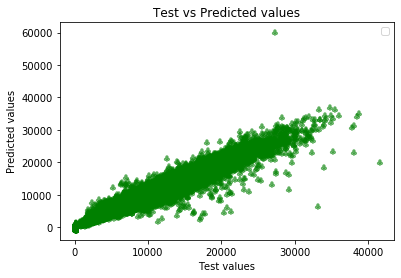

In [61]:
y_pred = model.predict(xtest)
plt.scatter(ytest, y_pred, c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.xlabel('Test values')
plt.ylabel('Predicted values')
plt.title('Test vs Predicted values')
plt.legend()

In [46]:
from sklearn import metrics

In [48]:
acc = metrics.r2_score(ytest, y_pred)

In [49]:
acc

0.9526145214181528

In [50]:
metrics.mean_squared_error(ytest, y_pred)

577859.3309097418

In [56]:
metrics.regression.explained_variance_score(ytest, y_pred)

0.9623042763587211

In [62]:
traindata.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'year', 'month', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StateHoliday'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE060ECD88>,
      dtype=object)

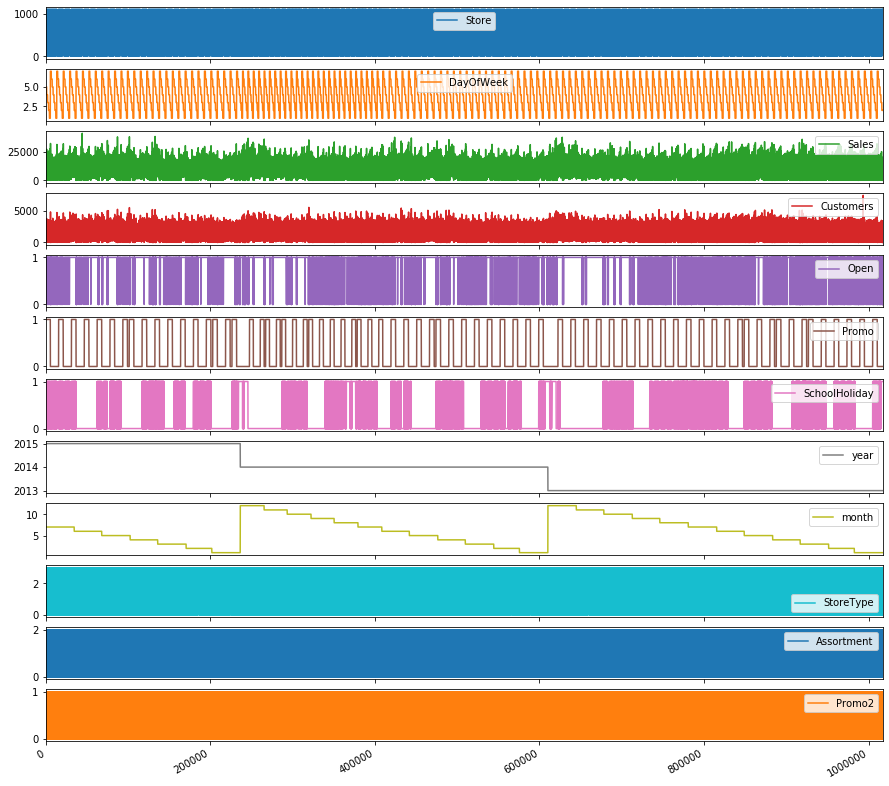

In [70]:
traindata.plot(figsize= (15,15),subplots=True)

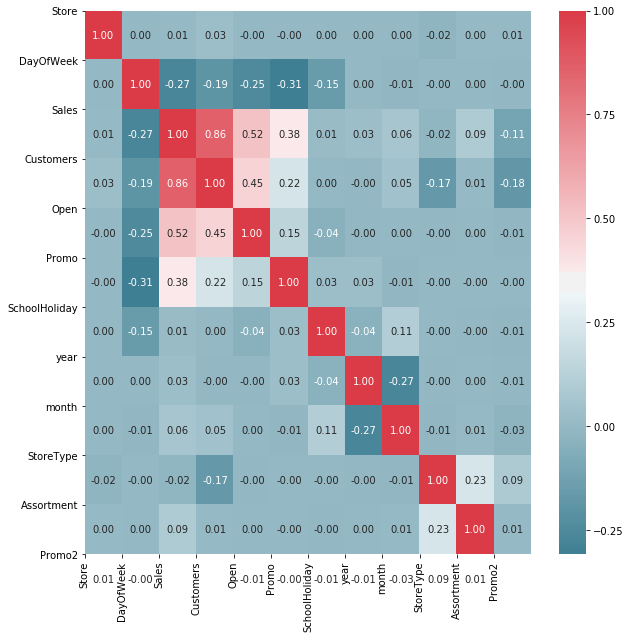

In [71]:
import seaborn as sns
corr = traindata.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()